In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Órbitas de los planetas

## Introducción

Las órbitas de los planetas son elipses que cumplen con las leyes de Kepler:

1. Todos los planetas se desplazan alrededor del Sol describiendo órbitas elípticas. El Sol se encuentra en uno de los focos de la elipse.
2. El radio vector que une un planeta y el Sol recorre áreas iguales en tiempos iguales.
3. Para cualquier planeta, el cuadrado de su período orbital es directamente proporcional al cubo de la longitud del semieje mayor de su órbita elíptica.

Estas leyes se puede obtener de la aplicación de la mecánica newtoniana. En este proyecto vamos a crear una simulación de las órbitas de los planetas en el sistema solar, donde resolvemos numéricamente las ecuaciones de movimiento de Newton.

## La segunda ley de Newton

El movimiento lineal de un objeto en la mecánica clásica newtoniana está descrito por la segunda ley de Newton:

$$\vec{F} = m\vec{a}$$

donde $\vec{F}$ es la fuerza neta, $\vec{a}$ es la aceleración del objeto y $m$ es su masa (inercial). Suponemos que el objeto no tiene grados de libertad internos, es decir, que es una partícula. La segunda ley se puede escribir en forma de una ecuación diferencial:

$$\frac{d^2\vec{x}}{dt^2} = \frac{\vec{F}}{m}$$

La trayectoria del objeto, $\vec{x}(t)$, resulta de resolver esta ecuación. En el caso de una fuerza general es difícil resolver analíticamente la ecuación, pero si la forma matemática de la fuerza es suficientemente simple, si se puede resolverla.

En el caso de la fuerza gravitacional, que es una fuerza central, es posible resolver la ecuación de movimiento analíticamente. Sin embargo, en este proyecto, vamos a resolver la ecuación con un método numérico (es decir, con el computador).

Primero, vamos a utilizar la aproximación de que los planetas y el Sol son masas puntuales. Además, vamos a despreciar los campos gravitatorios de los planetas, dado que la masa del Sol es mucho mayor que las masas de los planetas. La magnitud de la fuerza gravitacional entre dos masas $m$ y $M$ está dada por

$$|\vec{F}| = \frac{GMm}{|\vec{x}|^2}$$

donde $\vec{x}$ es un vector que apunta de una masa a la otra. Entonces, la magnitud de este vector es la distancia entre las masas.

**Importante:** en este proyecto trabajaremos en un plano bidimensional, suponiendo que las órbitas de los planets están limitadas a ese plano. Aunque no es exactamente así en la realidad, es una aproximación aceptable. Además las órbitas también son casi circulares para la mayoría de los planetas. Por lo tanto vamos a suponer órbitas circulares.

### Tarea 1

Determinar la constante gravitacional $G$ en unidades donde las masas están en masas solares, las longitudes en *unidades astronómicas* (UA) y el tiempo está en años.

#### Solución

En unidades SI la constante gravitacional es: $G_{SI} = 6.67408 \times 10^{-11} $m$^3$ kg$^{-1}$ s$^{-2}$

In [10]:
G_SI = 6.67408e-11

metros_en_ua = 1.495978707e11
kg_en_Msol = 1.98847e30
segundos_en_un_año = 3.154e7

In [11]:
G_SI/(metros_en_ua**3)*kg_en_Msol*segundos_en_un_año**2

39.432797917226765

El resultado es: $G = 39.433$ UA$^3$ yr$^{-2}$ M$_{sol}^{-1}$, donde usamos "yr" (del inglés *year*) para indicar "año". Numéricamente es preferible trabajar con números así que un número muy pequeño como lo que tenemos para $G_{SI}$. Tampoco es buena idea usar números muy grandes en una simulación si es posible evitar. Este es para eliminar errores numéricos.

### Tarea 2

Usando el valor de $G$ ya calculado, definir una función en Python para calcular la fuerza gravitacional *por unidad de masa* entre el Sol y un planeta en la posición $x$, $y$ en el plano.

#### Solución

La magnitud de la fuerza gravitacional entre dos masas es:
    
$$|\vec{F}| = \frac{GMm}{|\vec{x}|^2}$$

y la dirección es a lo largo de la línea que une las dos masas. Vamos a usar el Sol como la masa $M$, y un planeta con masa $m$. La fuerza *por unidad de masa* del planeta entonces es:

$$\frac{|\vec{F}|}{m} = \frac{GM}{|\vec{x}|^2}$$

La distancia radial entre el Sol y el planeta $d = |\vec{x}|$ (con el Sol en el orígen de las coordenadas) es:

$$d = \sqrt{x^2 + y^2}$$

Todavía hay que calcular las componentes del vector $\vec{F}$. En coordenadas polares las componentes en $x, y$ son:

$F_x = |\vec{F}| \cos \theta$, $F_y = |\vec{F}| \sin \theta$

El ángulo $\theta$ (el ángulo entre el vector de posición del planeta y el eje $x$) está dado por $\tan^{-1}(y/x)$. Podemos usar la función de Python `arctan2` para evitar problemas del cálculo de $\theta$ en distantas cuadrantes del plano.

In [12]:
G = 39.433 #AU^3 yr^{-2} M_sol^{-1}

def fuerza(x,y,M):
    # Abajo es un ejemplo de un "docstring" en Python, muy útil para explicar que hace la función!
    '''
    Función para calcular la fuerza gravitacional entre el Sol y un planeta.
    3 argumentos: x, posición del planeta en x
                  y, posición del planeta en y
                  M, masa del Sol (siempre 1.0 en las unidades que usamos)
    Returns: tuple, las componentes de la fuerza en x,y
    '''
    theta = arctan2(y,x)
    d = sqrt(x**2 + y**2)
    Fx = -((G*M)/d**2)*cos(theta)
    Fy = -((G*M)/d**2)*sin(theta)
    
    return( Fx, Fy )

(En el Notebook se puede obtener ayuda sobre cualquier función en Python con el uso de "?", incluyendo las funciones que nosotros definimos, si incluye un "docstring" como en el caso arriba.)

In [15]:
?fuerza

### Tarea 3

Determinar las condiciones iniciales para la partícula que representa la Tierra, para que se mueva en una órbita circular alrededor del Sol. Definir variables `x0`, `y0`, `vx0`, `vy0` en Python para guardar estos valores.

#### Solución

La Tierra está a $1$ UA (en promedio) del Sol. Vamos a indicar la posición inicial con $x_0, y_0$. Colocamos la Tierra en el eje $x$ solamente (por ahora), así que tenemos $x_0 = 1.0$ y $y_0 = 0.0$. Para esta posición, la velocidad en el eje $x$, para una órbita circular, debe ser **nulo**. Entonces la velocidad tangencial de la partícula es solamente en la dirección $y$.

Podemos calcular esta velocidad considerando el período de la órbita ($1$ año). La circunferencia de la órbita es:

$c = 2\pi d = 2\pi$

ya que $d = 1$ para la Tierra en las unidades que usamos. Entonces requerimos una velocidad tangencial tal que la Tierra puede recorrer una distancia de $2\pi$ UA en $1$ año:

$v_{y0} = c/1 = 2\pi$ \[UA/yr\]

In [16]:
x0 = 1.0 #Distancia de la tierra en AU
y0 = 0.0

vx0 = 0.0
vy0 = (2.0*pi*1.0)/1.0

### Tarea 4

Aplicar el método de *diferencias finitas* a la segunda ley de Newton para calcular la posición y velocidad de la Tierra en el momento $0.001$ años después del momento inicial.

#### Solución

Como vimos en la clase, una posible aproximación a la derivada en el método de diferencias finitas es la siguiente:

$$\frac{df}{dt} \approx \frac{f(t+h) - f(t)}{h}$$

Para la segunda ley de Newton (que es una ecuación con **vectores**) tenemos que aplicar el método de diferencias finítas a cada componente:

$$\frac{d\vec{x}}{dt} \approx \frac{\vec{x}(t+h)-\vec{x}(t)}{h}$$

Separando las componentes tenemos

$$\frac{dx}{dt} \approx \frac{x(t+h)-x(t)}{h}, \quad \quad \frac{dy}{dt} \approx \frac{y(t+h)-y(t)}{h}$$

En el lado izquierdo de las ecuaciones arriba tenemos las componentes de la velocidad, así que escribimos (reemplazando $\approx$ por $=$ para simplificar la vida):

$$v_x = \frac{1}{h}(x(t+h) - x(t)), \quad \quad v_y = \frac{1}{h}(y(t+h)-y(t))$$

Vimos en la clase que la notación común para $x(t)$ es $x_i$ donde $i$ es el índice que corresponde al momento $t$. Por lo tanto $x(t+h)$ es $x_{i+1}$ ya que $t+h$ es el momento después de $t$ en nuestra discretización del tiempo.

Entonces podemos escribir las ecuaciones para la velocidad así:

$$v_{(x)i+1} = \frac{1}{h}(x_{i+1} - x_i), \quad \quad v_{(y)i+1} = \frac{1}{h}(y_{i+1} - y_i)$$

donde indicamos que los valores de $v_x$ y $v_y$ son del momento $t+h$ (índice $i+1$). De hecho, para la derivada continua exacta los valores de $v_x$ y $v_y$ corresponden al momento $t$ y NO $t+h$. Pero en la aproximación de diferencias finitas, ya que no tomamos el límite, podemos elegir el momento en el tiempo que corresponde. La aproximación es mejor si elegimos $t+h$.

Ahora es fácil reorganizar las ecuaciones para encontrar la nueva posición del planeta en el momento $t+h$, después del momento $t$, es decir, los valores de $x,y$ con índice $i+1$:

$$ x_{i+1} = v_{(x)i+1}h + x_i, \quad \quad y_{i+1} = v_{(y)i+1}h + y_i$$

Pero... cómo podemos obtener los valores de $v_x,v_y$ en el momento $t+h$? Aplicamos la segunda ley de Newton! La segunda ley dice:

$$m\vec{a} = \vec{F}, \quad \Rightarrow \quad \vec{a} = \vec{F}/m$$

La aceleración es, por supuesto, la derivada de la velocidad con respecto al tiempo:

$$\frac{d\vec{v}}{dt} = \vec{a}$$

Entonces, podemos escribir la segunda ley, en componentes, como

$$\frac{dv_x}{dt} = F_x/m, \quad \quad \frac{dv_y}{dt} = F_y/m$$

Aplicando el método de diferencias finitas de nuevo tenemos

$$\frac{v_x(t+h) - v_x(t)}{h} = F_x/m, \quad \quad \frac{v_y(t+h) - v_y(t)}{h} = F_y/m$$

En la notación con índices estas ecuaciones son

$$(v_{(x)i+1} - v_{(x)i}) = F_{(x)i}h/m, \quad \quad (v_{(y)i+1} - v_{(y)i}) = F_{(y)i}h/m$$

Reorganizamos estas ecuaciones para encontrar la nueva velocidad:

$$v_{(x)i+1} = F_{(x)i}h/m + v_{(x)i}, \quad \quad v_{(y)i+1} = F_{(y)i}h/m + v_{(y)i}$$

Ya podemos calcular la fuerza por unidad de masa $F_x/m$ y $F_y/m$, así que tenemos todo lo que necesitamos para calcular la posición y velocidad del planeta en el momento $t+h$.

In [17]:
h = 0.001

In [18]:
Fx, Fy = fuerza(x0,y0,1.0) #fuerza por unidad de masa!

vx1 = Fx*h + vx0 #calculamos la velocidad primero
vy1 = Fy*h + vy0

x1 = vx1*h + x0 #usamos la velocidad nueva para calcular la posición nueva
y1 = vy1*h + y0

In [19]:
x0, y0

(1.0, 0.0)

In [20]:
x1, y1

(0.999960567, 0.006283185307179587)

### Tarea 5

Calcular los valores de posición y velocidad de la Tierra durante $100$ años ($100$ órbitas) usando el valor de $h=0.1$ (es decir, una diferencia entre cada momento del tiempo de $0.1$ años). Guardar los resultados en arreglos de NumPy.

#### Solución

In [66]:
tiempo_total = 100
h = 0.1

Con el tiempo total $T$ igual a $100$ años, y la separación de los *timesteps* $h$ igual a $0.1$, podemos obtener el número total de valores que tenemos que guardar con $N = T/h$. Si $h$ no divide $T$ exactamente, tenemos que obtener un valor entero porque no tiene sentido tener arreglos de un número no entero de elementos.

In [67]:
N = int(tiempo_total/h) #Usamos int para convertir el resultado de la división a un valor entero.

In [68]:
x = zeros(N) #Creamos arreglos de N elementos para guardar todos los valores de posición y velocidad
y = zeros(N)

vx = zeros(N)
vy = zeros(N)

In [69]:
x[0] = x0 #Los primeros elementos de cada uno de estos arreglos corresponden a las condiciones iniciales.
y[0] = y0

vx[0] = vx0
vy[0] = vy0

Ahora hay que aplicar nuestro método para cada momento del tiempo. ¿Cómo lo hacemos? Con un ciclo! Usamos un ciclo `for` para *iterar* sobre todos los momentos entre $0$ y $N-2$, ya que en la iteración para el momento $N-2$ calculamos los valores nuevos en el momento $N-1$. El momento $N-1$ es el último de la simulación con $N$ momentos en total ya que partimos de $0$.

In [70]:
for i in range(N-1): #Cuidado! la función "range" comienza con i=0 y termina en i=N-2...
     
    Fx, Fy = fuerza(x[i],y[i],1.0)
    
    vx[i+1] = Fx*h + vx[i]
    vy[i+1] = Fy*h + vy[i]
    
    x[i+1] = vx[i+1]*h + x[i]
    y[i+1] = vy[i+1]*h + y[i]

Ahora graficamos el resultado:

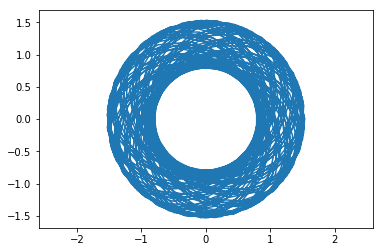

In [71]:
axis("equal")
plot(x,y)

Pero... la órbita no es circular! Hay desviaciones de la órbita circular, y después de trazar la línea de todas las $100$ órbitas tenemos un "anillo" de posiciones en vez de un círculo. ¿Qué pasó?

### Tarea 6

Encontrar la razón por el error en la órbita.

#### Solución

Vimos en la clase que la precisión de la simulación depende del valor de $h$. En la derivada exacta $h$ se va a cero en el límite. Así que la aproximación de diferencias finitas va mejorando con valores más y más pequeños de $h$. Intentamos con $h=0.001$ (dos ordenes de magnitud menor).

In [76]:
tiempo_total = 100
h = 0.001

In [77]:
N = int(tiempo_total/h)

In [78]:
x = zeros(N)
y = zeros(N)

vx = zeros(N)
vy = zeros(N)

In [79]:
x[0] = x0 #Los primeros elementos de cada uno de estos arreglos corresponden a las condiciones iniciales.
y[0] = y0

vx[0] = vx0
vy[0] = vy0

In [80]:
for i in range(N-1):
    
    Fx, Fy = fuerza(x[i],y[i],1.0)
    
    vx[i+1] = Fx*h + vx[i]
    vy[i+1] = Fy*h + vy[i]
    
    x[i+1] = vx[i+1]*h + x[i]
    y[i+1] = vy[i+1]*h + y[i]

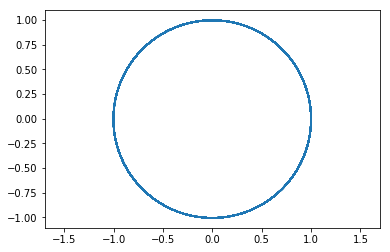

In [81]:
axis("equal")
plot(x,y)

Mucho mejor! Pero hay un costo... Ahora el número total de momentos en el tiempo es $100$ veces mayor. Antes era:

$$T/h = N \quad \Rightarrow \quad N = 100/0.1 = 1000$$

Ahora tenemos

$$T/h = N \quad \Rightarrow \quad N = 100/0.001 = 100000$$

Este significa que la simulación demora más tiempo y ocupa más memoria.

### Tarea 7

Para simplificar la ejecución de la simulación, definir una función que corre la simulación desde el punto inicial. Los argumentos a la función deben ser solamente las condiciones iniciales, el tiempo total y el valor de $h$. El tiempo total y el valor de $h$ deben tener valores por defecto de $100$ y $0.001$ respectivamente (usando argumentos opcionales).

#### Solución

Es mucho más conveniente definir una función para correr la simulación en vez de ejecutar las mismas células en el Notebook:

In [85]:
def calcular_orbitas(x0,y0,vx0,vy0,tiempo_total=100,h=0.001):
    '''
    Función para calcular las órbitas durante el tiempo_total, con timestep h, dado las condiciones iniciales.
    Argumentos: x0, y0, posición inicial
                vx0, vy0, velocidad inicial
                tiempo_total, Tiempo total de la simulación (en unidades de la simulación)
                h, valor del timestep 
    Dependencias: depende de la función "fuerza" para calcular la fuerza gravitational entre el Sol y un planeta
    Returns: arreglos de N elementos (N=tiempo_total/h) que contienen todos los valores de posicion y velocidad
    '''
    N = int(tiempo_total/h)
    
    x = zeros(N)
    y = zeros(N)

    vx = zeros(N)
    vy = zeros(N)
    
    x[0] = x0
    y[0] = y0

    vx[0] = vx0
    vy[0] = vy0
    
    for i in range(N-1):
    
        Fx, Fy = fuerza(x[i],y[i],1.0)
    
        vx[i+1] = Fx*h + vx[i]
        vy[i+1] = Fy*h + vy[i]
    
        x[i+1] = vx[i+1]*h + x[i]
        y[i+1] = vy[i+1]*h + y[i]
        
    return(x,y,vx,vy)

Ahora podemos calcular la órbita de cualquier planeta usando la función arriba. Por ejemplo:

In [86]:
x_tierra, y_tierra, vx_tierra, vy_tierra = calcular_orbitas(x0,y0,vx0,vy0)

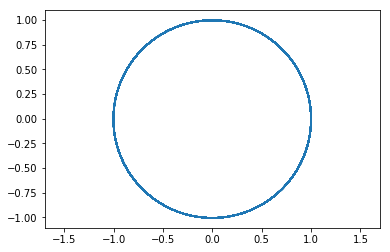

In [87]:
axis("equal")
plot(x_tierra,y_tierra)

### Tarea 7

Usar la función definida en Tarea 6 para calcular la órbita de **Júpiter** durante $100$ años. Los datos relevantes de Júpiter son

* Radio de su órbita (promedio) d = 5,2 AU
* Período de su órbita P = 11,862 años
* Velocidad inicial = $2\pi d/P$

In [88]:
radio_jupiter = 5.2
periodo_jupiter = 11.682
velocidad_jupiter = 2.0*pi*radio_jupiter/periodo_jupiter

In [89]:
x_jupiter, y_jupiter, vx_jupiter, vy_jupiter = calcular_orbitas(radio_jupiter,0.0,0.0,velocidad_jupiter)

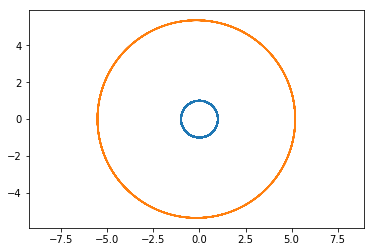

In [91]:
axis("equal")
plot(x_tierra,y_tierra)
plot(x_jupiter,y_jupiter)

### Tarea 8

En el Notebook se puede limpiar un gráfico con la función `clear_output` (del módulo `IPython.display`). Utilizar esta función para crear una animación de las órbitas de los planetas.

Podría ser útil usar un paso más grande para el ciclo sobre los valores en los arreglos. Se puede controlar eso en la función `range` así:

In [100]:
for i in range(0,10,1):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [104]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8


#### Solución

In [105]:
from IPython.display import clear_output

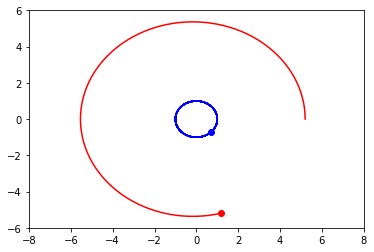

In [109]:
for i in range(0,10000,100):
    axis([-8,8,-6,6])
    plot(x_tierra[0:i],y_tierra[0:i],'b-')
    plot(x_tierra[i],y_tierra[i],'bo')
    plot(x_jupiter[0:i],y_jupiter[0:i],'r-')
    plot(x_jupiter[i],y_jupiter[i],'ro')
    show()
    clear_output(wait=True)